# "Корреляция и корреляционный анализ"

In [1]:
!pip install sktime

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\artio\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Задание 1.
Ответить на вопрос: есть ли связь между временем и выпадаемой на флопе комбинацией?

 - Построить точечный график
 - Рассчитать коэффициенты корреляции Пирсона и Спирмена
 - Построить модель линейной регрессии
 - Рассчитать коэффициент детерминации
 - Вывести график остатков

In [7]:
# загрузим датасет
data = pd.read_csv('water.csv')
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [6]:
data = data[data.columns.tolist()[1:5]] # убираем столбец с индексом
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<AxesSubplot:title={'center':'Связь между жёсткостью воды и средней годовой смертностью'}, xlabel='hardness', ylabel='mortality'>

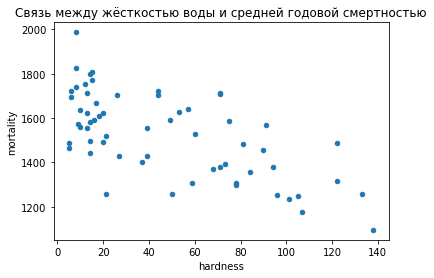

In [3]:
# Строим общий график
data.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Связь между жёсткостью воды и средней годовой смертностью')

In [6]:
# Считаем коэф. корреляции Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [4]:
# Считаем коэф. корреляции Спирмана
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [5]:
# Считаем коэф. корреляции Кендела
data[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
X = data[['hardness']]
y = data['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train) # метод обучаеться на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [18]:
print(model.coef_, model.intercept_)

[-3.03290421] 1674.316208502996


In [20]:
y_pred = model.predict(X_test)
y_pred

array([1355.8612662 , 1643.98716638, 1631.85554953, 1540.86842316,
       1437.74967994, 1613.65812426, 1270.93994826, 1446.84839257,
       1610.62522004, 1656.11878323, 1495.37485997, 1428.6509673 ,
       1556.03294422, 1631.85554953, 1458.98000942, 1556.03294422,
       1643.98716638, 1628.82264532, 1367.99288305, 1619.72393268,
       1525.7039021 , 1610.62522004, 1468.07872206, 1501.4406684 ,
       1255.77542719])

In [21]:
# коэффициент детерминации
model.score(X_test, y_test)

0.4614882677553057

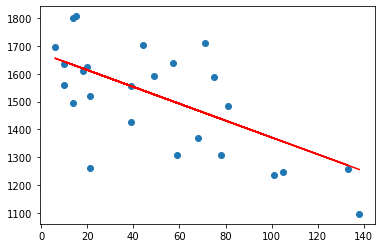

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Наблюдаем некая обратную связь между жосткостью воды и средней смертностю, отрицательная форма возможной зависимости присутствует.

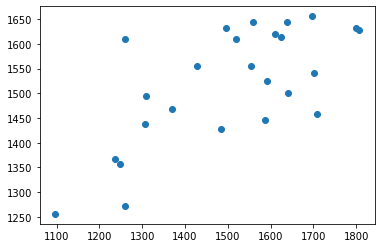

In [39]:
# Выведим остатки на график. Остатки - это не что иное, как то, 
# насколько ваши прогнозируемые значения отличаются от фактических значений. 
# Таким образом, он рассчитывается как фактические значения - прогнозируемые значения. 
# В вашем случае это остатки = y_test-y_pred

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.show()

В силу того, что у остатков просматриваеться тенденция, это говорит о том, что модель не удачная или мало данных.

# Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

 - Разделить данные на 2 группы
 - Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

<AxesSubplot:title={'center':'Связь между жёсткостью воды и смертностью населения в северных городах'}, xlabel='hardness', ylabel='mortality'>

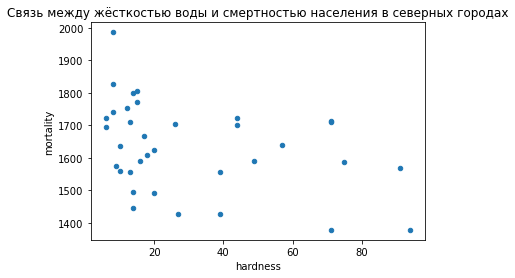

In [23]:
data_north = data.loc[data.location == 'North']
data_north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Связь между жёсткостью воды и смертностью населения в северных городах')

In [24]:
data_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [25]:
data_north[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [26]:
X_n = data_north[['hardness']]
y_n = data_north['mortality']
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.40, random_state=42)

In [27]:
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train) 
y_n_pred = model_n.predict(X_n_test)
model_n.score(X_n_test, y_n_test)

-0.007286452033987922

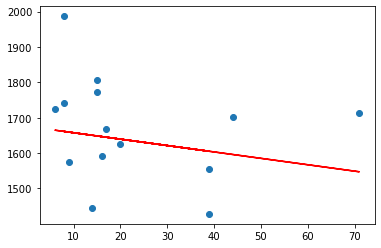

In [28]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

<AxesSubplot:title={'center':'Связь между жёсткостью воды и смертностью населения в южных городах'}, xlabel='hardness', ylabel='mortality'>

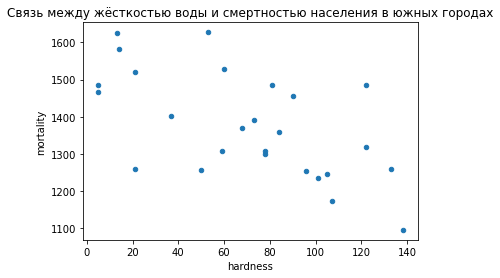

In [30]:
data_south = data.loc[data.location == 'South']
data_south.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Связь между жёсткостью воды и смертностью населения в южных городах')

In [31]:
data_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [32]:
data_south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [33]:
X_s = data_south[['hardness']]
y_s = data_south['mortality']
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.40, random_state=42)

In [34]:
model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train) 
y_s_pred = model_s.predict(X_s_test)
models.score(X_s_test, y_s_test)

-0.7912771733269186

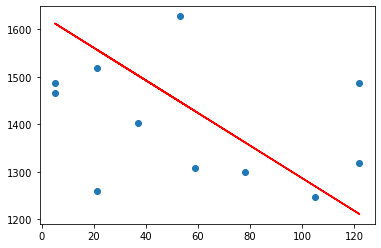

In [35]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

Из-за недостатка данных какие-то достаточно обоснованныек выводы сделать не представляеться возможным

<AxesSubplot:xlabel='mortality'>

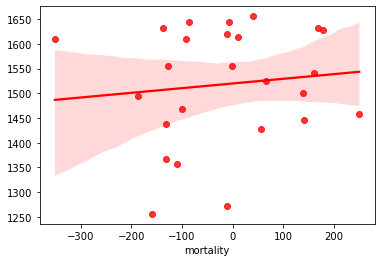

In [41]:
import seaborn as sns
residual = y_test-y_pred
sns.regplot(x = residual, y = y_pred, data = None, scatter = True, color = 'red')

Красота ) и что с этим делать ?